In the Logistic regression code without regularization we found around 2% difference between
train and test accuracy. Let's L2 regularization and see what it does

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd

%matplotlib inline

In [15]:
#the first step is loading the data and pre-processing
#Lets load the data into pandas dataframe
data = pd.read_csv("Breast_cancer_data.csv") 
data['diagnosis_flag'] = np.where(data['diagnosis']=='M', 1, 0)

train_data=data.sample(frac=0.8,random_state=200)
test_data=data.drop(train_data.index)

test = train_data['diagnosis_flag']
test_numpy = test.values
Y_train= (test_numpy.reshape((-1,1)))

test = test_data['diagnosis_flag']
test_numpy = test.values
Y_test= (test_numpy.reshape((-1,1)))

train = train_data[data.columns.difference(['diagnosis', 'Unnamed: 32','diagnosis_flag'])]
#Then we will do pre-processing where we will subtract the mean and divide by the 
#max-min
train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


#Convert the train_norm to a numpy matrix
X_train=train_norm.values

test = test_data[data.columns.difference(['diagnosis', 'Unnamed: 32','diagnosis_flag'])]
#Then we will do pre-processing where we will subtract the mean and divide by the 
#max-min
test_norm = test.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


#Convert the train_norm to a numpy matrix
X_test=test_norm.values

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(455, 31)
(114, 31)
(455, 1)
(114, 1)


In [16]:
#Next we will create the sigmoid function
def sigmoid (z):
    return np.exp(z)*1.00/(1+np.exp(z))

In [17]:
#Next we will initialize the W and b values based on the number of features in the
#training dataset
#first calculate the number of features, which is equal to the number of columns in train_norm
num_features = X_train.shape[1]
W = np.zeros((num_features,1))
b = 0



In [18]:
#Next we will create the forward propogation function which will take the W and b
#values for creating the prediction
def forward_prop(W,b,X):
    return sigmoid(np.matmul(X, W)+b)

#print (forward_prop(W,b,train_norm_numpy))

Next we will create the function to calculate the loss for a given parameter value
This is the log-likelihood function where we sum the log of predictions if its 1 or
log of (1- prediction) if its 0 and take a -ve of all that. Thus our goal is to minimize
this loss function. For L1 regularization we will be adding a regularization parameter and add the W parameter to the cost function.

In [19]:

def loss(W,b,X,Y,lambd):
    m = X.shape[0]
    A=forward_prop(W,b,X)
    return -1.00/m*np.sum((np.multiply(Y, np.log(A))+np.multiply((1-Y), np.log(1-A)))) +0.500/m*(lambd)*np.sum(np.square(W)) 
    #return 1.00/m*(lambd)*np.sum(np.absolute(W))
#print (loss(W,b,X_train,Y_train))

In [20]:
#Next we will calculate the gradient values for the W and b for one full iteration of gradient
#descent
def gradient (Y,X,prediction,lambd,W):
    m = X.shape[0]
    db = 1.00/m*(np.sum(prediction - Y))
    #print (np.transpose(X))
    #W_copy = np.copy(W)
    dw = 1.00/m*(np.dot(np.transpose(X),prediction - Y)) +1.00/m*(lambd)*(W)
    #dw_regularized_term = 1.00/m*(lambd)*modDerivative(W_copy)
    return db,dw

In [21]:
learning_rate = 0.5
number_of_steps = 100
lambd = 1
for i in range (number_of_steps):
    A = forward_prop(W,b,X_train)
    
    db,dw = gradient(Y_train,X_train,A,lambd,W)
    #print (W)
    W = W - learning_rate* dw
    b = b - learning_rate* db
    print (loss(W,b,X_train,Y_train,lambd))

0.658438907123
0.627996334959
0.60111230544
0.577209616322
0.555819553117
0.536561703951
0.519126488524
0.503260736087
0.488756107636
0.475439947819
0.463168114709
0.4518193756
0.441291023529
0.431495437753
0.422357371984
0.413811803913
0.40580221877
0.398279229958
0.391199462797
0.384524644904
0.378220859861
0.372257930769
0.366608907812
0.361249639656
0.356158412867
0.351315646868
0.346703634514
0.342306320382
0.33810911039
0.334098707616
0.330262970103
0.32659078725
0.323071971944
0.319697166113
0.316457757757
0.31334580784
0.310353985681
0.3074755117
0.304704106545
0.302033945782
0.299459619443
0.296976095826
0.294578689035
0.292263029812
0.290025039277
0.287860905237
0.285767060785
0.283740164918
0.281777084971
0.279874880659
0.278030789565
0.276242213918
0.27450670853
0.272821969786
0.271185825557
0.269596225974
0.268051234959
0.266549022456
0.26508785728
0.263666100542
0.26228219959
0.260934682416
0.259622152495
0.258343284018
0.257096817469
0.255881555545
0.25469635936
0.253540

In [22]:
def predict(X_train,Y_train,X_test,Y_test,learning_rate,number_of_steps,lambd):
    num_features = X_train.shape[1]
    W = np.zeros((num_features,1))
    b = 0
    test_accuracy = []
    iterations = []
    for i in range(number_of_steps):
        A = forward_prop(W,b,X_train)
        db,dw = gradient(Y_train,X_train,A,lambd,W)
        W = W - learning_rate* dw
        b = b - learning_rate* db
        #print (loss(W,b,X_train,Y_train))
        A_test = forward_prop(W,b,X_test)
        Y_prediction_test =  np.where(A_test > 0.5, 1, 0)
        #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        test_accuracy.append(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)
        iterations.append(i)
        
        A_train = forward_prop(W,b,X_train)
        Y_prediction_train =  np.where(A_train > 0.5, 1, 0)
        #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #print (test_accuracy)
    test_accuracy = np.squeeze(test_accuracy)
    plt.plot(test_accuracy)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(iterations))
    plt.show()
    plt.plot(test_accuracy)
    print (100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)
    print (100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100)

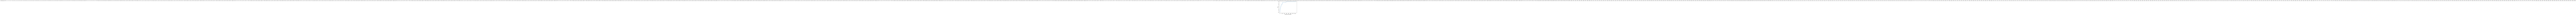

93.8596491228
96.043956044


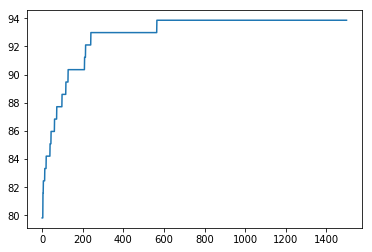

In [23]:
predict(X_train,Y_train,X_test,Y_test,0.1,1500,1)

In [24]:
print (W)
print (b)

[[ 0.88338028]
 [ 0.35523213]
 [ 0.87428675]
 [ 0.65811528]
 [ 0.15083584]
 [ 0.70132537]
 [ 1.21347004]
 [ 0.27251989]
 [ 1.51798615]
 [ 0.95309494]
 [ 0.02990896]
 [ 0.85728055]
 [-0.23262663]
 [-0.09347224]
 [ 0.26126935]
 [ 0.05384561]
 [ 1.06225592]
 [ 0.46336095]
 [ 1.12540309]
 [ 1.07571619]
 [ 0.50643969]
 [ 1.17214551]
 [ 0.41604936]
 [-0.06980724]
 [ 0.66225637]
 [ 0.33640974]
 [-0.05913246]
 [ 0.49992705]
 [ 0.62309217]
 [-0.03311955]
 [ 0.81674523]]
-0.730526868663


In [25]:
print (W)

[[ 0.88338028]
 [ 0.35523213]
 [ 0.87428675]
 [ 0.65811528]
 [ 0.15083584]
 [ 0.70132537]
 [ 1.21347004]
 [ 0.27251989]
 [ 1.51798615]
 [ 0.95309494]
 [ 0.02990896]
 [ 0.85728055]
 [-0.23262663]
 [-0.09347224]
 [ 0.26126935]
 [ 0.05384561]
 [ 1.06225592]
 [ 0.46336095]
 [ 1.12540309]
 [ 1.07571619]
 [ 0.50643969]
 [ 1.17214551]
 [ 0.41604936]
 [-0.06980724]
 [ 0.66225637]
 [ 0.33640974]
 [-0.05913246]
 [ 0.49992705]
 [ 0.62309217]
 [-0.03311955]
 [ 0.81674523]]
